In [375]:
%matplotlib inline


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from matplotlib import pyplot

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier



In [376]:
df_2020 = pd.read_csv("C:/Users/Toomas/Desktop/ITMI_Data/Cleaned_datasets_25_64/Yearly/2020_cleaned_weights.csv")

In [377]:
# drop irrelevant columns for analysis
df_2020 = df_2020.drop(columns=['survey_year', 'respondent_id', 'age','bmi','bmi_four_groups','bmi_two_groups_split25', 'weights'])

In [378]:
# create dummy variables
# first change values from numeric to nominal for readable dummy labels

df_2020['gender'] = df_2020['gender'].replace([1,2],['MALE','FEMALE'])
df_2020['age_group'] = df_2020['age_group'].replace([1,2,3,4],['25_34','35_44','45_54','55_64'])
df_2020['ethnicity_estonian_nonestonian'] = df_2020['ethnicity_estonian_nonestonian'].replace([1,2],['ESTONIAN','NON_ESTONIAN'])
df_2020['education'] = df_2020['education'].replace([1,2,3,4],['PRIMARY_BASIC','SECONARY','SECONDARY_VOCATIONAL','HIGHER'])
df_2020['income_per_household_member'] = df_2020['income_per_household_member'].replace([1,2,3,4],['QUARTILE_1','QUARTILE_2','QUARTILE_3','QUARTILE_4'])
df_2020['chronic_disease'] = df_2020['chronic_disease'].replace([1,2],['YES','NO'])
df_2020['smoking_history'] = df_2020['smoking_history'].replace([1,2,3,4],['NEVER','FORMERLY','SELDOM','DAILY'])
df_2020['alcohol_standard_units_consumption_frequency'] = df_2020['alcohol_standard_units_consumption_frequency'].replace([1,2,3,4,5],['NEVER','<1x_MONTH','1+x_MONTH','1x_WEEK','ALMOST_DAILY'])
df_2020['exercising_frequency'] = df_2020['exercising_frequency'].replace([1,2,3,4,5,6],['NEVER','1x_MONTH','2_3x_MONTH','1x_WEEK','2_3x_WEEK', '4_7X_WEEK'])
df_2020['work_physical_effort_level'] = df_2020['work_physical_effort_level'].replace([1,2,3,4],['LITTLE','SOME','AVERAGE','A_LOT'])


df_dummies = pd.get_dummies(df_2020, columns=['gender', 'age_group', \
                                              'ethnicity_estonian_nonestonian', 'education',\
                                              'income_per_household_member', 'chronic_disease',\
                                              'smoking_history',\
                                              'alcohol_standard_units_consumption_frequency',\
                                              'exercising_frequency',\
                                              'work_physical_effort_level'],drop_first=False)

In [379]:
df_dummies.columns

Index(['bmi_two_groups_split30', 'gender_FEMALE', 'gender_MALE',
       'age_group_25_34', 'age_group_35_44', 'age_group_45_54',
       'age_group_55_64', 'ethnicity_estonian_nonestonian_ESTONIAN',
       'ethnicity_estonian_nonestonian_NON_ESTONIAN', 'education_HIGHER',
       'education_PRIMARY_BASIC', 'education_SECONARY',
       'education_SECONDARY_VOCATIONAL',
       'income_per_household_member_QUARTILE_1',
       'income_per_household_member_QUARTILE_2',
       'income_per_household_member_QUARTILE_3',
       'income_per_household_member_QUARTILE_4', 'chronic_disease_NO',
       'chronic_disease_YES', 'smoking_history_DAILY',
       'smoking_history_FORMERLY', 'smoking_history_NEVER',
       'smoking_history_SELDOM',
       'alcohol_standard_units_consumption_frequency_1+x_MONTH',
       'alcohol_standard_units_consumption_frequency_1x_WEEK',
       'alcohol_standard_units_consumption_frequency_<1x_MONTH',
       'alcohol_standard_units_consumption_frequency_ALMOST_DAILY',
    

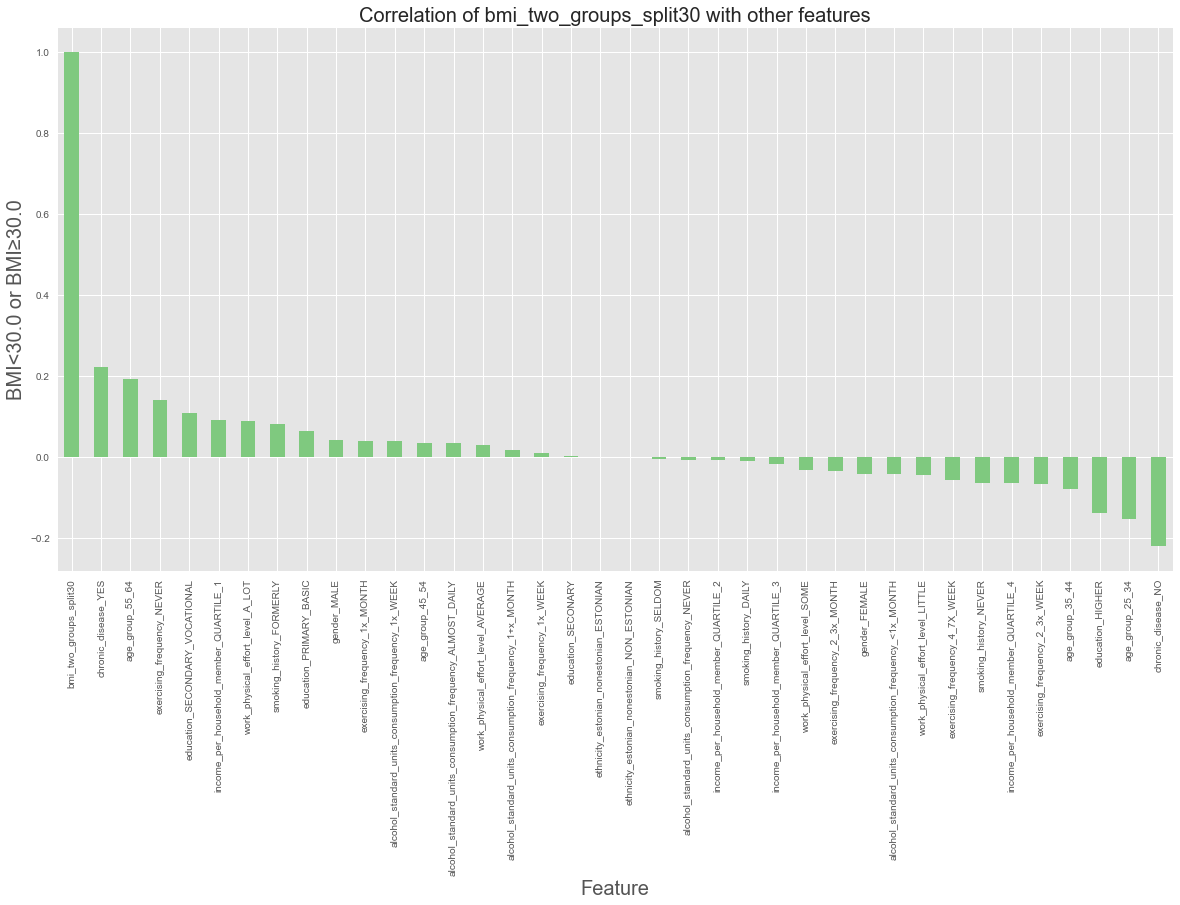

<Figure size 432x288 with 0 Axes>

In [380]:
## correlation graph
plt.style.use('ggplot')
plt.figure(figsize = (20,10))

# get a color map

my_cmap = cm.get_cmap('Accent')

# Get correlation of bmi_two_groups_split25 with other variables

df_dummies.corr()['bmi_two_groups_split30'].sort_values(ascending = False).plot(kind='bar', cmap=my_cmap)

# set titles for figure, x and 

plt.title('Correlation of bmi_two_groups_split30 with other features', fontsize=20)
plt.xlabel('Feature', fontsize=20)
plt.ylabel('BMI<30.0 or BMI≥30.0', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/correlations.pdf")

In [381]:
# scaling all variables to the range of 0 to 1 before data learning process

y = df_dummies['bmi_two_groups_split30'].values
X = df_dummies.drop(columns = ['bmi_two_groups_split30'])

features = X.columns.values
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [382]:
#split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

print("The shape of X_train dataset: ", X_train.shape)
print("The shape of y_train dataset: ", y_train.shape)
print("The shape of X_test dataset: ", X_test.shape)
print("The shape of y_test dataset: ", y_test.shape)

The shape of X_train dataset:  (1389, 37)
The shape of y_train dataset:  (1389,)
The shape of X_test dataset:  (348, 37)
The shape of y_test dataset:  (348,)


In [383]:
# oversample the mintority class

sm = SMOTE(random_state=42)
X_train_res,y_train_res = sm.fit_resample(X_train,y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res==2)))

After OverSampling, the shape of train_X: (2164, 37)
After OverSampling, the shape of train_y: (2164,) 

After OverSampling, counts of label '1': 1082
After OverSampling, counts of label '2': 1082


In [384]:
#========================================================
# 01A Logistic regression model training / original data
#=======================================================

model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression()

In [385]:
#print out the hyperparameters of the trained model
model_LR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [386]:
# Logistic regression model prediction and metrics (original dataset)
y_pred = model_LR.predict(X_test)

print('LR model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

LR model metrics:
Accuracy: 0.79
Precision: 	 0.80
Recall: 	 0.97
F1-score: 	 0.88


In [387]:
# LR model performance with K-folds validation (original dataset)

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_LR_1 = LogisticRegression()
scores1 = cross_val_score(model_LR_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_LR_1, X, y, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_LR_1, X, y, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_LR_1, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))

Accuracy: 0.78
Precision: 0.80
Recall: 0.97
F1 Score: 0.87


Feature: 0, Score: 0.05647
Feature: 1, Score: -0.05663
Feature: 2, Score: -0.67162
Feature: 3, Score: -0.19115
Feature: 4, Score: 0.18722
Feature: 5, Score: 0.67539
Feature: 6, Score: 0.04495
Feature: 7, Score: -0.04511
Feature: 8, Score: -0.35134
Feature: 9, Score: 0.32862
Feature: 10, Score: -0.20709
Feature: 11, Score: 0.22965
Feature: 12, Score: 0.11679
Feature: 13, Score: -0.11287
Feature: 14, Score: 0.02815
Feature: 15, Score: -0.03223
Feature: 16, Score: -0.40245
Feature: 17, Score: 0.40229
Feature: 18, Score: -0.45306
Feature: 19, Score: 0.37409
Feature: 20, Score: -0.05274
Feature: 21, Score: 0.13156
Feature: 22, Score: 0.11241
Feature: 23, Score: 0.13248
Feature: 24, Score: 0.09700
Feature: 25, Score: -0.04757
Feature: 26, Score: -0.29448
Feature: 27, Score: 0.22750
Feature: 28, Score: 0.16130
Feature: 29, Score: -0.07432
Feature: 30, Score: -0.11055
Feature: 31, Score: -0.43975
Feature: 32, Score: 0.23566
Feature: 33, Score: -0.04577
Feature: 34, Score: 0.18846
Feature: 35, 

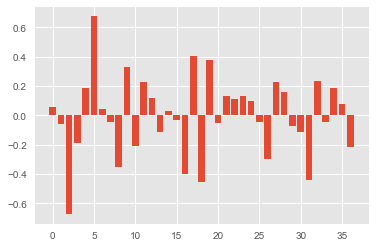

In [388]:
# get importance of features in LR model (original dataset)
importance = model_LR.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AxesSubplot(0.125,0.125;0.775x0.755)


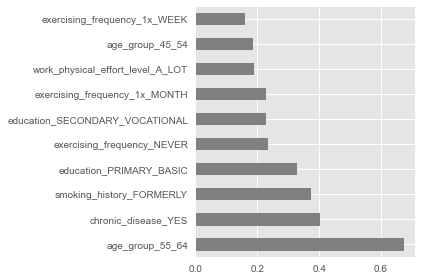

In [389]:
# getting the weights of 10 most important features with association BMI≥30.0 in LR model (original dataset)

weights = pd.Series(model_LR.coef_[0], index = X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='barh', color='grey'))
plt.tight_layout()
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/LR_features_most_BMI30.pdf", bbox_inches='tight')

AxesSubplot(0.125,0.125;0.775x0.755)


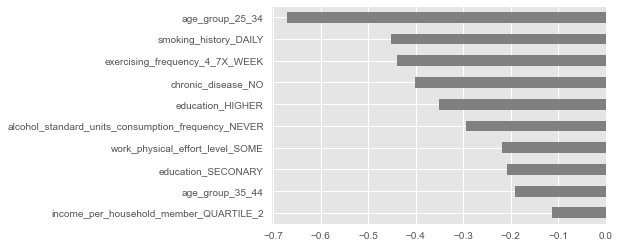

In [390]:
# getting the weights of 10 most important features with inverse association BMI≥30.0 in LR model (original dataset)
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/LR_features_least_BMI30.pdf", bbox_inches='tight')

In [391]:
# roc curve for LR model (original dataset)

pred_prob1 = model_LR.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [392]:
# computing auc score for LR (original dataset)
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)

0.6963626779124934


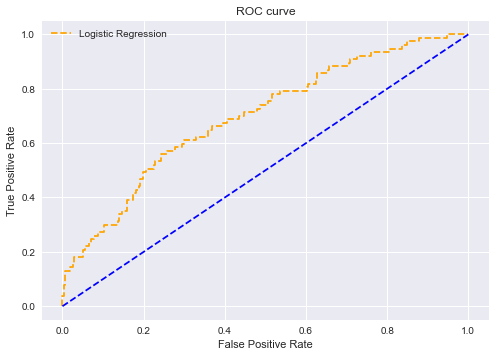

In [393]:
# plot the roc curve for LR (original dataset)

plt.style.use('seaborn')


plt.plot(tpr1, fpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_LR_BMI30.pdf")
plt.show();

In [394]:
#====================================================
# 01B Logistic regression model training / oversampled data
#====================================================

model_LR_res = LogisticRegression()
model_LR_res.fit(X_train_res, y_train_res)

LogisticRegression()

In [395]:

# Logistic regression model prediction and metrics (oversampled data)
y_pred = model_LR_res.predict(X_test)

print('LR model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

LR model metrics:
Accuracy: 0.66
Precision: 	 0.88
Recall: 	 0.66
F1-score: 	 0.75


In [396]:
# LR model performance with K-folds validation (oversampled data)

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#oversamplling the whole dataset (not just training data)
sm_all = SMOTE(random_state=42)
X_res,y_res = sm_all.fit_resample(X,y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_LR_1_res = LogisticRegression()
scores1 = cross_val_score(model_LR_1_res, X_res, y_res, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_LR_1_res, X_res, y_res, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_LR_1_res, X_res, y_res, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_LR_1_res, X_res, y_res, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))

Accuracy: 0.69
Precision: 0.69
Recall: 0.67
F1 Score: 0.68


Feature: 0, Score: 0.03623
Feature: 1, Score: -0.03626
Feature: 2, Score: -0.83364
Feature: 3, Score: -0.18339
Feature: 4, Score: 0.19284
Feature: 5, Score: 0.82417
Feature: 6, Score: 0.05485
Feature: 7, Score: -0.05487
Feature: 8, Score: -0.23699
Feature: 9, Score: 0.24510
Feature: 10, Score: -0.31156
Feature: 11, Score: 0.30342
Feature: 12, Score: 0.16117
Feature: 13, Score: -0.11320
Feature: 14, Score: 0.07480
Feature: 15, Score: -0.12280
Feature: 16, Score: -0.40150
Feature: 17, Score: 0.40147
Feature: 18, Score: -0.44317
Feature: 19, Score: 0.36366
Feature: 20, Score: -0.04970
Feature: 21, Score: 0.12918
Feature: 22, Score: 0.12600
Feature: 23, Score: 0.10951
Feature: 24, Score: 0.08298
Feature: 25, Score: 0.04622
Feature: 26, Score: -0.36473
Feature: 27, Score: 0.29378
Feature: 28, Score: 0.16632
Feature: 29, Score: -0.04249
Feature: 30, Score: -0.11332
Feature: 31, Score: -0.46732
Feature: 32, Score: 0.16300
Feature: 33, Score: -0.05755
Feature: 34, Score: 0.15384
Feature: 35, S

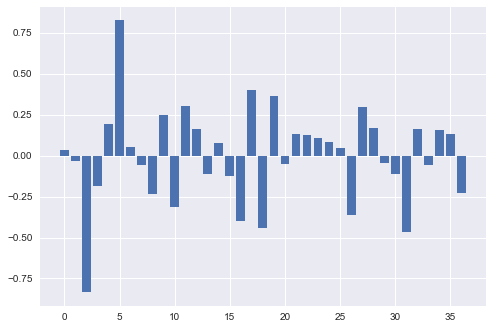

In [397]:
# get importance of features in LR model (oversampled dataset)
importance = model_LR_res.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AxesSubplot(0.125,0.125;0.775x0.755)


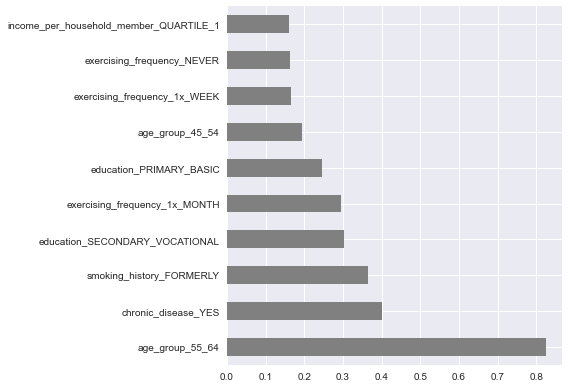

In [398]:
# getting the weights of 10 most important features with association BMI≥30.0 in LR model (oversampled data)

weights = pd.Series(model_LR_res.coef_[0], index = X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='barh', color='grey'))
plt.tight_layout()
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/LR_features_most_BMI30_res.pdf", bbox_inches='tight')

AxesSubplot(0.125,0.125;0.775x0.755)


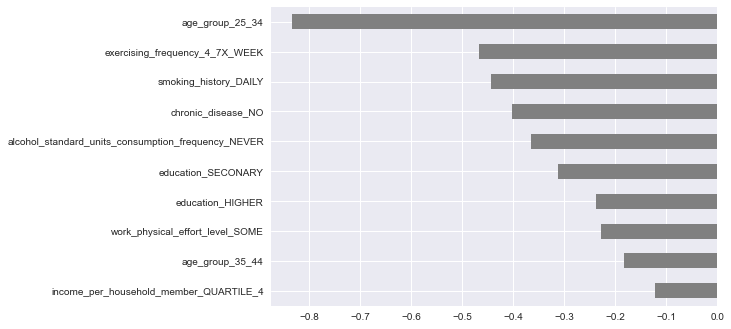

In [399]:
# getting the weights of 10 most important features with inverse association BMI≥30.0 in LR model (oversampled dataset)
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/LR_features_least_BMI30_res.pdf", bbox_inches='tight')

In [400]:
# roc curve for LR model (oversampled data)

pred_prob1 = model_LR_res.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [401]:
# computing auc score for LR (oversampled data)
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)


0.6916183447548762


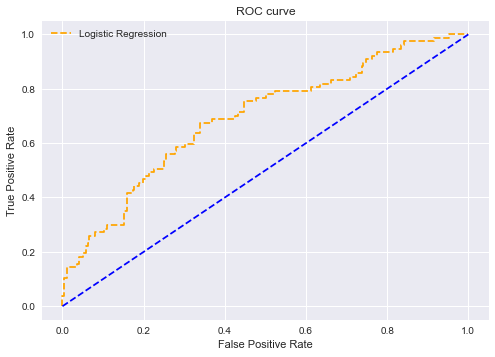

In [402]:
# plot the roc curve for LR (oversampled data)

plt.style.use('seaborn')


plt.plot(tpr1, fpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_LR_BMI30_res.pdf")
plt.show();

In [403]:
#====================================
# 02A Random Forest model training
#====================================

model_RF = RandomForestClassifier()

model_RF.fit(X_train, y_train)


RandomForestClassifier()

In [404]:
#print out the hyperparameters of the trained model (original data)
model_RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [405]:
# Random forest model prediction and metrics (original data)

y_pred = model_RF.predict(X_test)

print('RF model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

RF model metrics:
Accuracy: 0.77
Precision: 	 0.80
Recall: 	 0.93
F1-score: 	 0.86


In [406]:
# RF model performance with K-folds validation (original data)

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_RF_1 = RandomForestClassifier()
scores1 = cross_val_score(model_RF_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_RF_1, X, y, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_RF_1, X, y, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_RF_1, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))

Accuracy: 0.78
Precision: 0.81
Recall: 0.95
F1 Score: 0.87


Feature: 0, Score: 0.02646
Feature: 1, Score: 0.02610
Feature: 2, Score: 0.02455
Feature: 3, Score: 0.02645
Feature: 4, Score: 0.02613
Feature: 5, Score: 0.03998
Feature: 6, Score: 0.02567
Feature: 7, Score: 0.02660
Feature: 8, Score: 0.02733
Feature: 9, Score: 0.02511
Feature: 10, Score: 0.02346
Feature: 11, Score: 0.02830
Feature: 12, Score: 0.03006
Feature: 13, Score: 0.03658
Feature: 14, Score: 0.03172
Feature: 15, Score: 0.02817
Feature: 16, Score: 0.02843
Feature: 17, Score: 0.02810
Feature: 18, Score: 0.02318
Feature: 19, Score: 0.03495
Feature: 20, Score: 0.02809
Feature: 21, Score: 0.01252
Feature: 22, Score: 0.01871
Feature: 23, Score: 0.01972
Feature: 24, Score: 0.02843
Feature: 25, Score: 0.01338
Feature: 26, Score: 0.02895
Feature: 27, Score: 0.03195
Feature: 28, Score: 0.02887
Feature: 29, Score: 0.01820
Feature: 30, Score: 0.03085
Feature: 31, Score: 0.03018
Feature: 32, Score: 0.02205
Feature: 33, Score: 0.03419
Feature: 34, Score: 0.01836
Feature: 35, Score: 0.03645
Fe

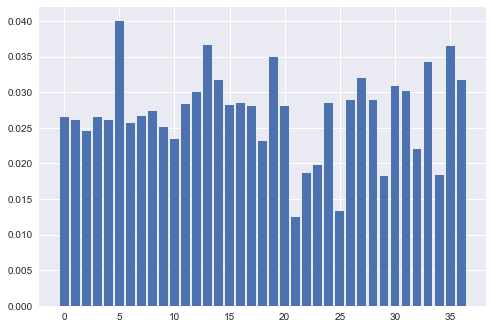

In [407]:
# calculation of RF model feature importance (original data)

importance = model_RF.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AxesSubplot(0.125,0.125;0.775x0.755)


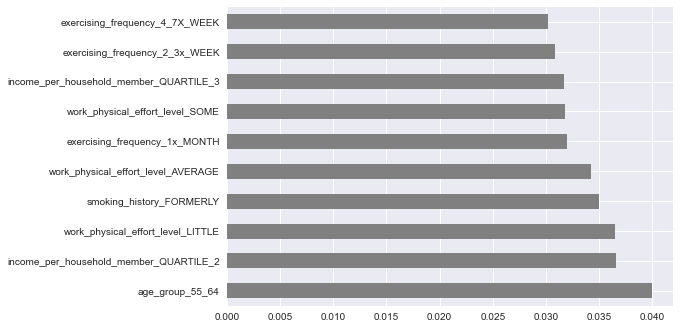

In [408]:
# 10 most important features/ BMI≥30.0 in RF model (original data)

weights = pd.Series(model_RF.feature_importances_, index = X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/RF_features_most_BMI30.pdf", bbox_inches='tight')

AxesSubplot(0.125,0.125;0.775x0.755)


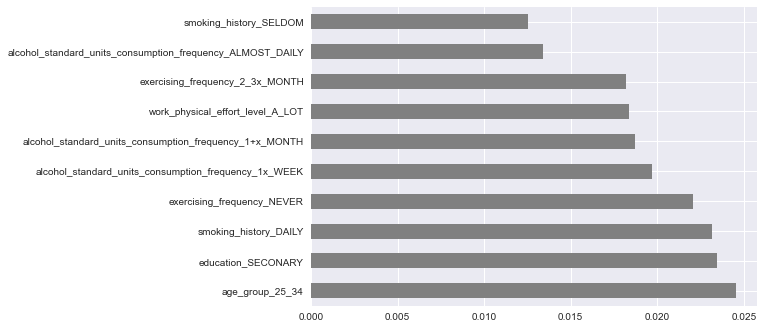

In [409]:
# 10 least important features/ BMI≥30.0 in RF model (original data)
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/RF_features_least_BMI30.pdf", bbox_inches='tight')

In [410]:
# roc curve for RF model (original data)

pred_prob2 = model_RF.predict_proba(X_test)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [411]:
# computing auc score for RF model (original data)
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
print(auc_score2)

0.6537355633296592


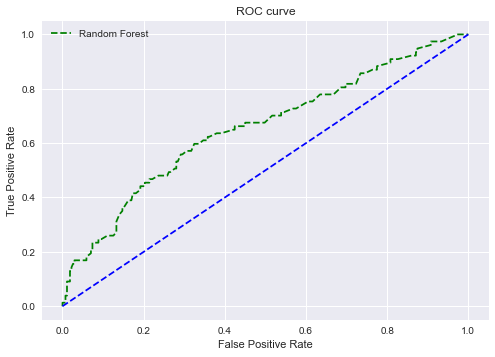

In [412]:
# plot roc curve for RF model (original data)

plt.style.use('seaborn')


plt.plot(tpr2, fpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_RF_BMI30.pdf")
plt.show();

In [413]:
#===================================================
# 02B Random Forest model training (oversampled data)
#===================================================

model_RF_res = RandomForestClassifier()
model_RF_res.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [414]:
# Random forest model prediction and metrics (oversampled data)

y_pred = model_RF_res.predict(X_test)

print('RF model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

RF model metrics:
Accuracy: 0.75
Precision: 	 0.81
Recall: 	 0.90
F1-score: 	 0.85


In [415]:
# RF model performance with K-folds validation (oversampled data)

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#oversamplling the whole dataset (not just training data)
sm_all = SMOTE(random_state=42)
X_res,y_res = sm_all.fit_resample(X,y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_RF_1_res = RandomForestClassifier()
scores1 = cross_val_score(model_RF_1_res, X_res, y_res, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_RF_1_res, X_res, y_res, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_RF_1_res, X_res, y_res, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_RF_1_res, X_res, y_res, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))

Accuracy: 0.86
Precision: 0.84
Recall: 0.91
F1 Score: 0.87


Feature: 0, Score: 0.02144
Feature: 1, Score: 0.02542
Feature: 2, Score: 0.03593
Feature: 3, Score: 0.03433
Feature: 4, Score: 0.02450
Feature: 5, Score: 0.05651
Feature: 6, Score: 0.02031
Feature: 7, Score: 0.02220
Feature: 8, Score: 0.02894
Feature: 9, Score: 0.02159
Feature: 10, Score: 0.02059
Feature: 11, Score: 0.03664
Feature: 12, Score: 0.02844
Feature: 13, Score: 0.02681
Feature: 14, Score: 0.02318
Feature: 15, Score: 0.02750
Feature: 16, Score: 0.04548
Feature: 17, Score: 0.05487
Feature: 18, Score: 0.02001
Feature: 19, Score: 0.03952
Feature: 20, Score: 0.02760
Feature: 21, Score: 0.00936
Feature: 22, Score: 0.01362
Feature: 23, Score: 0.01500
Feature: 24, Score: 0.02383
Feature: 25, Score: 0.01363
Feature: 26, Score: 0.02722
Feature: 27, Score: 0.03699
Feature: 28, Score: 0.02555
Feature: 29, Score: 0.01587
Feature: 30, Score: 0.03075
Feature: 31, Score: 0.03482
Feature: 32, Score: 0.01977
Feature: 33, Score: 0.02612
Feature: 34, Score: 0.01312
Feature: 35, Score: 0.02933
Fe

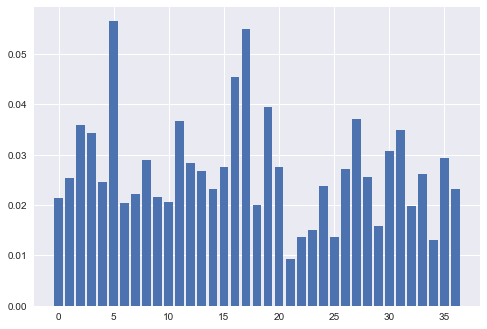

In [416]:
# calculation of RF model feature importance (oversampled data)

importance = model_RF_res.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


AxesSubplot(0.125,0.125;0.775x0.755)


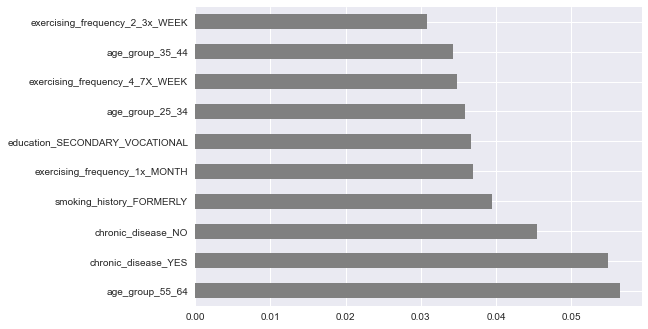

In [417]:
# 10 most important features/ BMI≥30.0 in RF model (oversampled data)

weights = pd.Series(model_RF_res.feature_importances_, index = X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/RF_features_most_BMI30_res.pdf", bbox_inches='tight')

AxesSubplot(0.125,0.125;0.775x0.755)


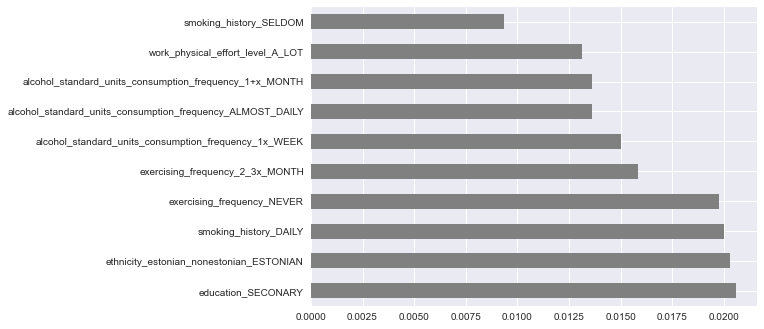

In [418]:
# 10 least important features/ BMI≥30.0 in RF model (oversampled data)
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/RF_features_least_BMI30_res.pdf", bbox_inches='tight')

In [419]:
# roc curve for RF model (oversampled data)

pred_prob2 = model_RF_res.predict_proba(X_test)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [420]:
# computing auc score for RF model (oversampled data)
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
print(auc_score2)

0.6357406431207169


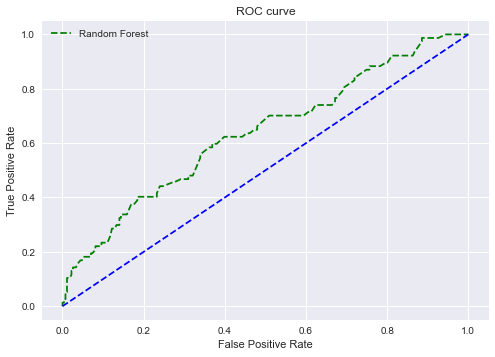

In [421]:
# plot roc curve for RF model (oversampled data)

plt.style.use('seaborn')


plt.plot(tpr2, fpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_RF_BMI30_res.pdf")
plt.show();

In [422]:
#====================================
# 03A SVM model training (original data)
#====================================

model_SVM=SVC(probability = True, kernel ='linear')
model_SVM.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [423]:
#print out the hyperparameters of the trained model (original data)
model_SVM.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [424]:
# SVM model prediction and metrics (original data)

y_pred = model_SVM.predict(X_test)

print('SVM model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))


SVM model metrics:
Accuracy: 0.78
Precision: 	 0.78
Recall: 	 1.00
F1-score: 	 0.88


In [425]:
# SVM model performance with K-folds validation (original data)

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_SVM_1 = SVC(probability = True, kernel ='linear')
scores1 = cross_val_score(model_SVM_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_SVM_1, X, y, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_SVM_1, X, y, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_SVM_1, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))

Accuracy: 0.78
Precision: 0.78
Recall: 1.00
F1 Score: 0.88


AxesSubplot(0.125,0.125;0.775x0.755)


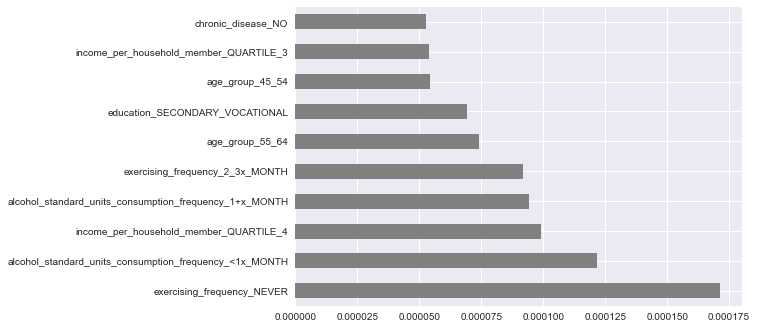

In [426]:
# 10 most important variables affecting BMI≥30.0 in SVM model (original data) 

weights = pd.Series(model_SVM.coef_[0], index = X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/SVM_features_most_BMI30.pdf", bbox_inches='tight')

AxesSubplot(0.125,0.125;0.775x0.755)


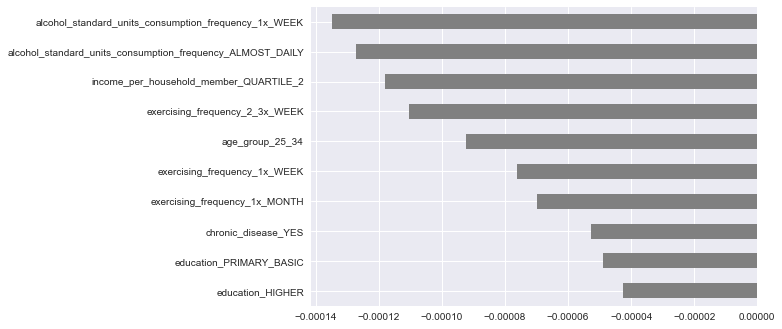

In [427]:
# # 10 least important variables affecting BMI≥30.0 in SVM model (original data) 
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/SVM_features_least_BMI30.pdf", bbox_inches='tight')

In [428]:
# roc curve for SVM model (original data) 

pred_prob3 = model_SVM.predict_proba(X_test)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [429]:
# computing auc score for SVM (original data) 
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
print(auc_score3)

0.531844539224613


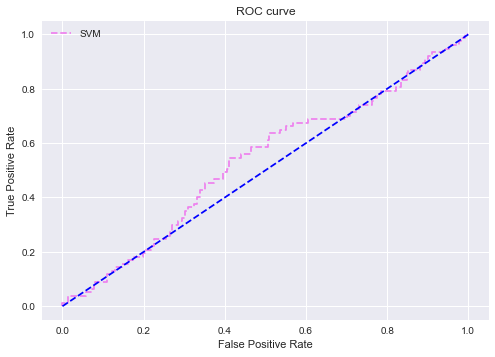

In [430]:
# plot roc curve for SVM model (original data)
plt.style.use('seaborn')


plt.plot(tpr3, fpr3, linestyle='--',color='violet', label='SVM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_SVM_BMI30.pdf")
plt.show();

In [431]:
#==========================================
# 03B SVM model training (oversampled data)
#==========================================

model_SVM_res=SVC(probability = True, kernel ='linear')
model_SVM_res.fit(X_train_res, y_train_res)

SVC(kernel='linear', probability=True)

In [432]:
# SVM model prediction and metrics (oversampled data)

y_pred = model_SVM_res.predict(X_test)

print('SVM model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

SVM model metrics:
Accuracy: 0.63
Precision: 	 0.86
Recall: 	 0.63
F1-score: 	 0.73


In [433]:
# RF model performance with K-folds validation (oversampled data)


#oversamplling the whole dataset (not just training data)
sm_all = SMOTE(random_state=1)
X_res,y_res = sm_all.fit_resample(X,y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_SVM_1_res = SVC(probability = True, kernel ='linear')
scores1 = cross_val_score(model_SVM_1_res, X_res, y_res, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_SVM_1_res, X_res, y_res, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_SVM_1_res, X_res, y_res, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_SVM_1_res, X_res, y_res, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))

Accuracy: 0.66
Precision: 0.67
Recall: 0.64
F1 Score: 0.65


AxesSubplot(0.125,0.125;0.775x0.755)


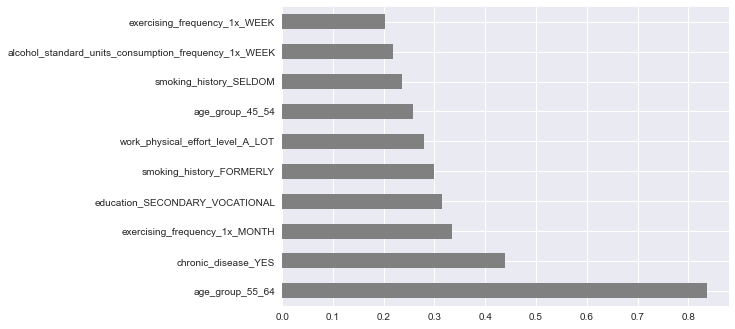

In [434]:
# 10 most important variables affecting BMI≥30.0 in SVM model (oversampled data) 

weights = pd.Series(model_SVM_res.coef_[0], index = X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/SVM_features_most_BMI30_res.pdf", bbox_inches='tight')

AxesSubplot(0.125,0.125;0.775x0.755)


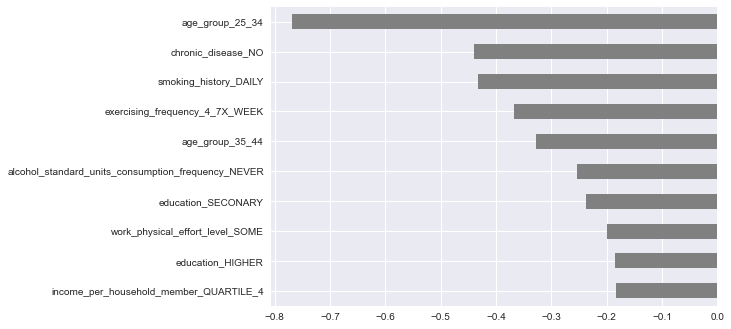

In [435]:
# # 10 least important variables affecting BMI≥30.0 in SVM model (oversampled data) 
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/SVM_features_least_BMI30_res.pdf", bbox_inches='tight')

In [436]:
# roc curve for SVM model (oversampled data) 

pred_prob3 = model_SVM_res.predict_proba(X_test)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [437]:
# computing auc score for SVM (oversampled data) 
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
print(auc_score3)

0.6989025734413189


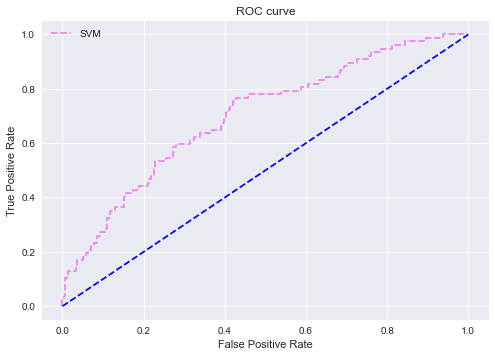

In [438]:
# plot roc curve for SVM model (oversampled data)
plt.style.use('seaborn')


plt.plot(tpr3, fpr3, linestyle='--',color='violet', label='SVM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_SVM_BMI30_res.pdf")
plt.show();

In [439]:
#=============================================
# Decision Tree model training (original data)
#=============================================

model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [440]:
#print out the hyperparameters of the trained model (original data)
model_DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [441]:
# DT model prediction and metrics (original data)

y_pred = model_DT.predict(X_test)

print('DT model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

DT model metrics:
Accuracy: 0.70
Precision: 	 0.80
Recall: 	 0.81
F1-score: 	 0.81


In [442]:
# DT model performance with K-folds validation (original data)

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_DT_1 = DecisionTreeClassifier()
scores1 = cross_val_score(model_DT_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_DT_1, X, y, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_DT_1, X, y, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_DT_1, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))

Accuracy: 0.71
Precision: 0.82
Recall: 0.82
F1 Score: 0.82


Feature: 0, Score: 0.02636
Feature: 1, Score: 0.03516
Feature: 2, Score: 0.00569
Feature: 3, Score: 0.01735
Feature: 4, Score: 0.02947
Feature: 5, Score: 0.03783
Feature: 6, Score: 0.03099
Feature: 7, Score: 0.03097
Feature: 8, Score: 0.01083
Feature: 9, Score: 0.03098
Feature: 10, Score: 0.01286
Feature: 11, Score: 0.02106
Feature: 12, Score: 0.03849
Feature: 13, Score: 0.04319
Feature: 14, Score: 0.02278
Feature: 15, Score: 0.02880
Feature: 16, Score: 0.04963
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.02296
Feature: 19, Score: 0.02616
Feature: 20, Score: 0.03909
Feature: 21, Score: 0.01833
Feature: 22, Score: 0.03109
Feature: 23, Score: 0.02676
Feature: 24, Score: 0.02916
Feature: 25, Score: 0.01270
Feature: 26, Score: 0.02439
Feature: 27, Score: 0.03259
Feature: 28, Score: 0.03720
Feature: 29, Score: 0.01808
Feature: 30, Score: 0.02153
Feature: 31, Score: 0.02850
Feature: 32, Score: 0.03336
Feature: 33, Score: 0.04368
Feature: 34, Score: 0.01856
Feature: 35, Score: 0.03114
Fe

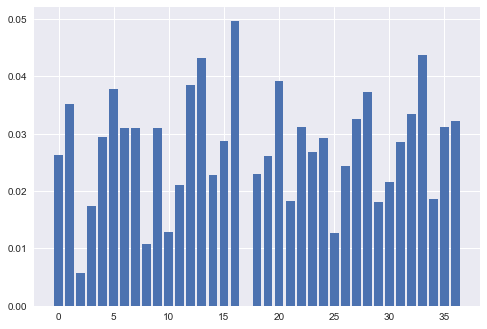

In [443]:
# plot feature important of DT/CART model (original data)
importance = model_DT.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AxesSubplot(0.125,0.125;0.775x0.755)


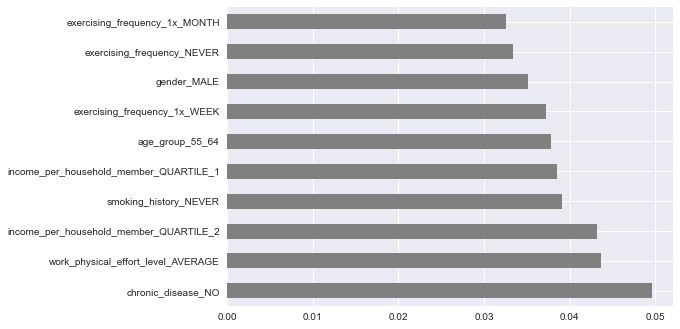

In [444]:
# 10 most important variables affecting BMI≥25.0 in DT model  (original data)

weights = pd.Series(model_DT.feature_importances_, index = X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/DT_features_most_BMI30.pdf", bbox_inches='tight')

AxesSubplot(0.125,0.125;0.775x0.755)


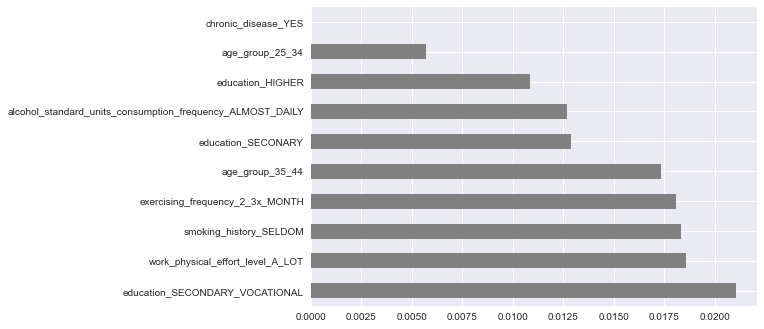

In [445]:
# 10 least important variables affecting BMI≥25.0 in DT model  (original data)
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/DT_features_least_BMI30.pdf", bbox_inches='tight')

In [446]:
# roc curve for DT model   (original data)

pred_prob4 = model_DT.predict_proba(X_test)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [447]:
# computing auc score for DT   (original data)
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
print(auc_score4)

0.5466526093832367


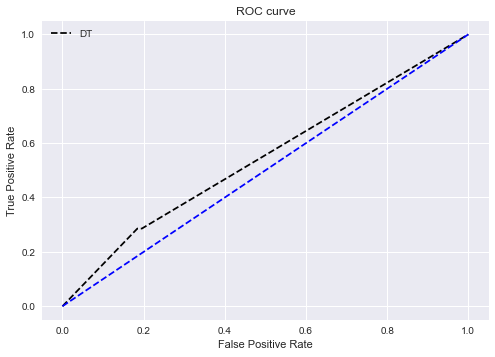

In [448]:
# plot roc curve for DT  (original data)

plt.style.use('seaborn')


plt.plot(tpr4, fpr4, linestyle='--',color='black', label='DT')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_DT_BMI30.pdf")
plt.show();

In [449]:
#=============================================
# Decision Tree model training (oversampled data)
#=============================================

model_DT_res = DecisionTreeClassifier()
model_DT_res.fit(X_train_res, y_train_res)

DecisionTreeClassifier()

In [450]:
# DT model prediction and metrics (oversampled data)

y_pred = model_DT_res.predict(X_test)

print('DT model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

DT model metrics:
Accuracy: 0.67
Precision: 	 0.79
Recall: 	 0.79
F1-score: 	 0.79


In [451]:
# DT model performance with K-folds validation (oversampled data)


#oversamplling the whole dataset (not just training data)
sm_all = SMOTE(random_state=42)
X_res,y_res = sm_all.fit_resample(X,y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_DT_1_res = DecisionTreeClassifier()
scores1 = cross_val_score(model_DT_1_res, X_res, y_res, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_DT_1_res, X_res, y_res, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_DT_1_res, X_res, y_res, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_DT_1_res, X_res, y_res, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))

Accuracy: 0.80
Precision: 0.80
Recall: 0.79
F1 Score: 0.80


AxesSubplot(0.125,0.125;0.775x0.755)


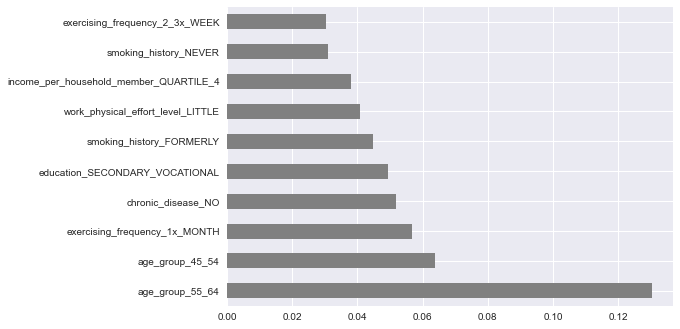

In [452]:
# 10 most important variables affecting BMI≥25.0 in DT model  (oversampled data)

weights = pd.Series(model_DT_res.feature_importances_, index = X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/DT_features_most_BMI30_RES.pdf", bbox_inches='tight')

AxesSubplot(0.125,0.125;0.775x0.755)


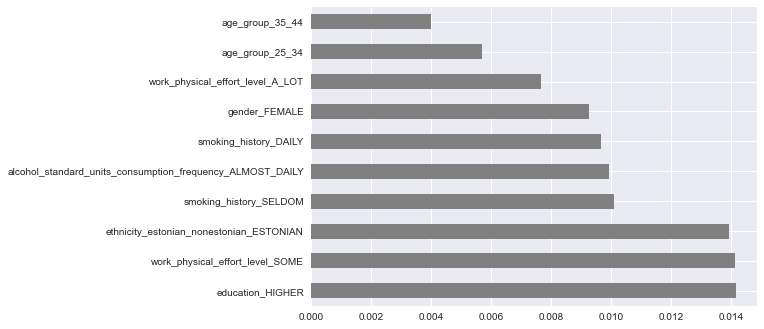

In [453]:
# 10 least important variables affecting BMI≥25.0 in DT model  (oversampled data)
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/DT_features_least_BMI30.pdf", bbox_inches='tight')

In [454]:
# roc curve for DT model   (oversampled data)

pred_prob4 = model_DT_res.predict_proba(X_test)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [455]:
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
print(auc_score4)

0.5107825753582211


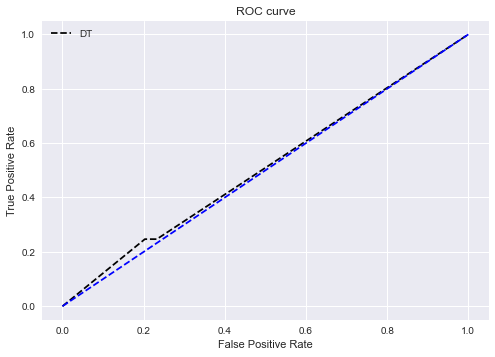

In [456]:
# plot roc curve for DT  (oversampled data)

plt.style.use('seaborn')


plt.plot(tpr4, fpr4, linestyle='--',color='black', label='DT')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_DT_BMI30_res.pdf")
plt.show();

In [457]:
#====================================================
# Gaussian Naive Bayes model training (original data)
#====================================================

model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [458]:
#print out the hyperparameters of the trained model (original data)
model_NB.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [459]:
# NB model prediction and metrics (original data)

y_pred = model_NB.predict(X_test)

print('NB model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

NB model metrics:
Accuracy: 0.74
Precision: 	 0.86
Recall: 	 0.80
F1-score: 	 0.83


In [460]:
# DT model performance with K-folds validation (original data)

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_NB_1 = GaussianNB()
scores1 = cross_val_score(model_NB_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_NB_1, X, y, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_NB_1, X, y, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_NB_1, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))

Accuracy: 0.71
Precision: 0.84
Recall: 0.78
F1 Score: 0.81


In [461]:
# plot feature important of NB model (original data)

from sklearn.inspection import permutation_importance

imps = permutation_importance(model_NB, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

Feature ranking:
1. exercising_frequency_NEVER (0.024138)
2. age_group_55_64 (0.012644)
3. age_group_25_34 (0.011494)
4. education_SECONDARY_VOCATIONAL (0.009195)
5. income_per_household_member_QUARTILE_1 (0.009195)
6. education_HIGHER (0.008046)
7. age_group_35_44 (0.007471)
8. work_physical_effort_level_SOME (0.006322)
9. exercising_frequency_2_3x_WEEK (0.005172)
10. work_physical_effort_level_A_LOT (0.004023)
11. alcohol_standard_units_consumption_frequency_1+x_MONTH (0.003448)
12. income_per_household_member_QUARTILE_4 (0.002299)
13. alcohol_standard_units_consumption_frequency_<1x_MONTH (0.001724)
14. smoking_history_DAILY (0.001149)
15. exercising_frequency_2_3x_MONTH (0.000575)
16. chronic_disease_YES (0.000575)
17. chronic_disease_NO (0.000575)
18. age_group_45_54 (0.000000)
19. education_PRIMARY_BASIC (0.000000)
20. gender_FEMALE (0.000000)
21. gender_MALE (0.000000)
22. smoking_history_SELDOM (0.000000)
23. education_SECONARY (0.000000)
24. income_per_household_member_QUARTIL

AxesSubplot(0.125,0.125;0.775x0.755)


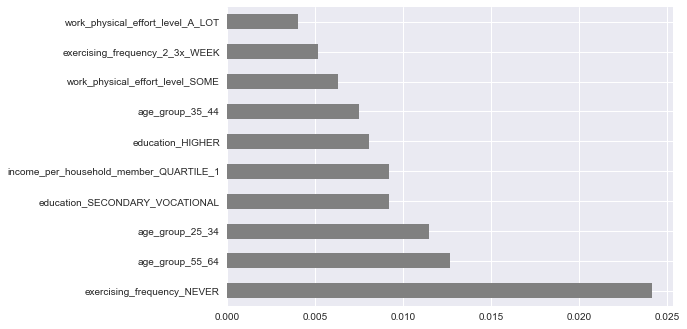

In [462]:
# greatest impact / NB model  (original data)

weights = pd.Series(importances, index = X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/NB_features_most_BMI30.pdf", bbox_inches='tight')


AxesSubplot(0.125,0.125;0.775x0.755)


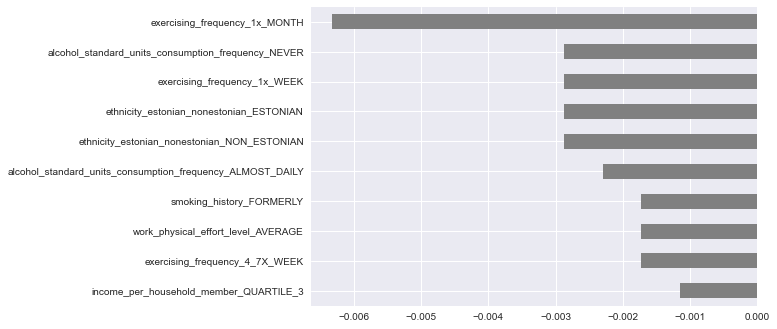

In [463]:
# least impact / NB model  (original data)
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/NB_features_least_BMI30.pdf", bbox_inches='tight')

In [464]:
# roc curve for NB model  (original data)

pred_prob5 = model_NB.predict_proba(X_test)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [465]:
# computing auc score for NB  (original data)
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])
print(auc_score5)

0.7389179086596062


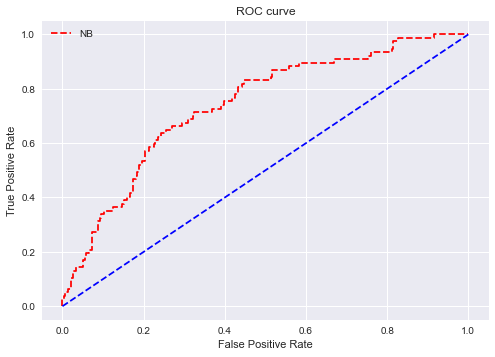

In [466]:
# plot roc curves for NB  (original data)

plt.style.use('seaborn')

plt.plot(tpr5, fpr5, linestyle='--',color='red', label='NB')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_NB_BMI30.pdf")
plt.show();

In [467]:
#====================================================
# Gaussian Naive Bayes model training (oversampled data)
#====================================================

model_NB_res = GaussianNB()
model_NB_res.fit(X_train_res, y_train_res)

GaussianNB()

In [468]:
# NB model prediction and metrics (oversampled data)

y_pred = model_NB_res.predict(X_test)

print('NB model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

NB model metrics:
Accuracy: 0.69
Precision: 	 0.88
Recall: 	 0.69
F1-score: 	 0.77


In [469]:
# DT model performance with K-folds validation (oversampled data)


#oversamplling the whole dataset (not just training data)
sm_all = SMOTE(random_state=42)
X_res,y_res = sm_all.fit_resample(X,y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_NB_1_res = DecisionTreeClassifier()
scores1 = cross_val_score(model_NB_1_res, X_res, y_res, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_NB_1_res, X_res, y_res, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_NB_1_res, X_res, y_res, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_NB_1_res, X_res, y_res, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))

Accuracy: 0.80
Precision: 0.80
Recall: 0.81
F1 Score: 0.80


AxesSubplot(0.125,0.125;0.775x0.755)


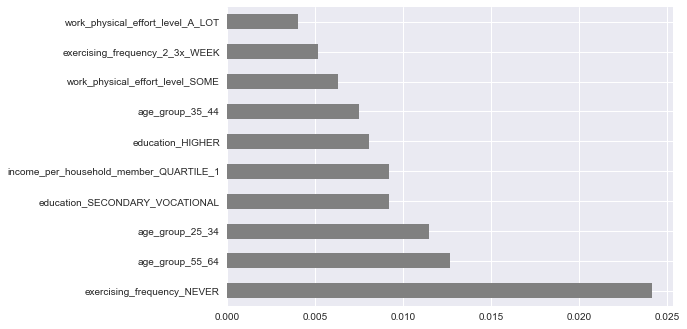

In [470]:
# greatest impact / NB model  (oversampled  data)

weights = pd.Series(importances, index = X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/NB_features_most_BMI30_RES.pdf", bbox_inches='tight')

AxesSubplot(0.125,0.125;0.775x0.755)


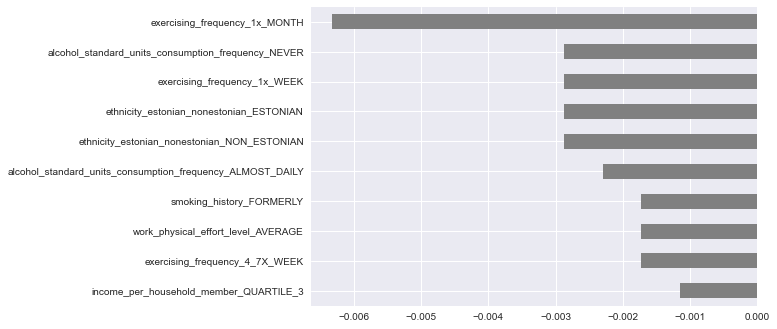

In [471]:
# least impact / NB model  (oversampled data)
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/NB_features_least_BMI30_res.pdf", bbox_inches='tight')

In [472]:
# roc curve for NB model  (oversampled data)

pred_prob5 = model_NB_res.predict_proba(X_test)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [473]:
# computing auc score for NB  (oversampled data)
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])
print(auc_score5)

0.7176882158431974


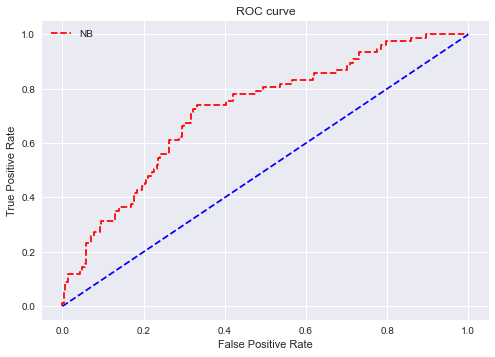

In [474]:
# plot roc curves for NB  (oversampled data)

plt.style.use('seaborn')

plt.plot(tpr5, fpr5, linestyle='--',color='red', label='NB')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_NB_BMI30_res.pdf")
plt.show();

In [475]:
#====================================
# KNN model training (original data)
#====================================

# testing accuracy for k from 1 to 25
k_range = range(1,26)
scores={}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing accuracy')

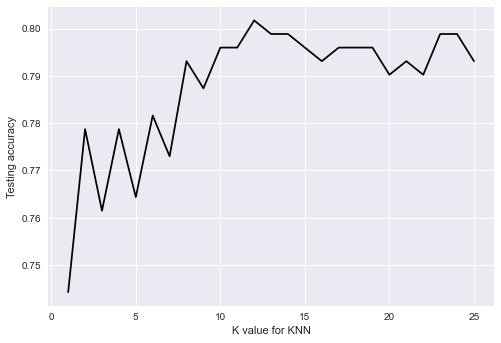

In [476]:
#plotting the relationship between k values and correspondgin testing accuracy (original data)

plt.plot(k_range,scores_list, color='black')
plt.xlabel('K value for KNN')
plt.ylabel('Testing accuracy')

In [477]:
# the final model should have k=12 (original data)
model_KNN = KNeighborsClassifier(n_neighbors=12)
model_KNN.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=12)

In [478]:
#print out the hyperparameters of the trained model (original data)
model_KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 12,
 'p': 2,
 'weights': 'uniform'}

In [479]:
# KNN model prediction and metrics (original data)

y_pred = model_KNN.predict(X_test)

print('KNN model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

KNN model metrics:
Accuracy: 0.80
Precision: 	 0.80
Recall: 	 1.00
F1-score: 	 0.89


In [480]:
# DT model performance with K-folds validation (original data)

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_KNN_1 = KNeighborsClassifier()
scores1 = cross_val_score(model_KNN_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_KNN_1, X, y, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_KNN_1, X, y, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_KNN_1, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))

Accuracy: 0.76
Precision: 0.80
Recall: 0.92
F1 Score: 0.86


In [481]:
# feature importance is not defined for the KNN classification algorithm and there is no easy way to calucate it

In [482]:
# roc curve for KNN model (original data)

pred_prob6 = model_KNN.predict_proba(X_test)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [483]:
# computing auc score for KNN (original data)
auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])
print(auc_score6)

0.6348780370920593


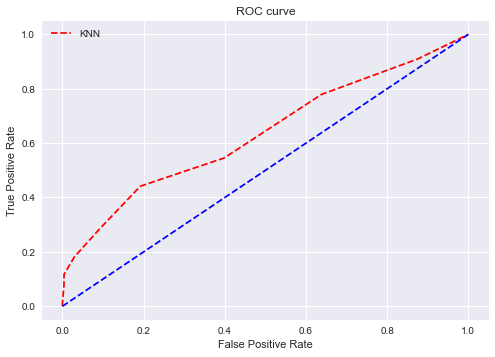

In [484]:
# plot roc curve (original data)

plt.style.use('seaborn')


plt.plot(tpr6, fpr6, linestyle='--',color='red', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_KNN_BMI30.pdf")
plt.show();

In [485]:
#====================================
# KNN model training (oversampled data)
#====================================

# testing accuracy for k from 1 to 25
k_range = range(1,26)
scores={}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_res,y_train_res)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing accuracy')

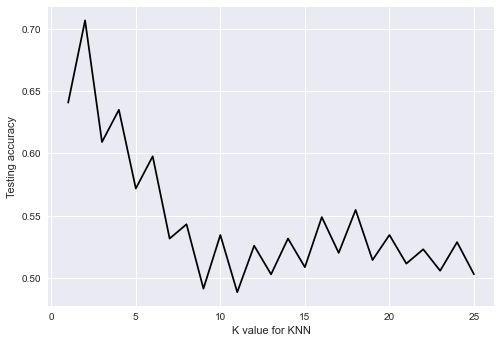

In [486]:
#plotting the relationship between k values and correspondgin testing accuracy (oversampled data)

plt.plot(k_range,scores_list, color='black')
plt.xlabel('K value for KNN')
plt.ylabel('Testing accuracy')

In [487]:
# the final model should have k=2 (oversampled data)
model_KNN_res = KNeighborsClassifier(n_neighbors=2)
model_KNN_res.fit(X_train_res, y_train_res)


KNeighborsClassifier(n_neighbors=2)

In [488]:
# KNN model prediction and metrics (oversampled data)

y_pred = model_KNN_res.predict(X_test)

print('KNN model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

KNN model metrics:
Accuracy: 0.71
Precision: 	 0.84
Recall: 	 0.76
F1-score: 	 0.80


In [489]:
# DT model performance with K-folds validation (oversampled data)


#oversampling the whole dataset (not just training data)
sm_all = SMOTE(random_state=42)
X_res,y_res = sm_all.fit_resample(X,y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_KNN_1_res = DecisionTreeClassifier()
scores1 = cross_val_score(model_KNN_1_res, X_res, y_res, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_KNN_1_res, X_res, y_res, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_KNN_1_res, X_res, y_res, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_KNN_1_res, X_res, y_res, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))

Accuracy: 0.80
Precision: 0.80
Recall: 0.80
F1 Score: 0.79


In [490]:
# roc curve for KNN model (oversampled data)

pred_prob6 = model_KNN_res.predict_proba(X_test)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [491]:
auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])
print(auc_score6)

0.6769061197105477


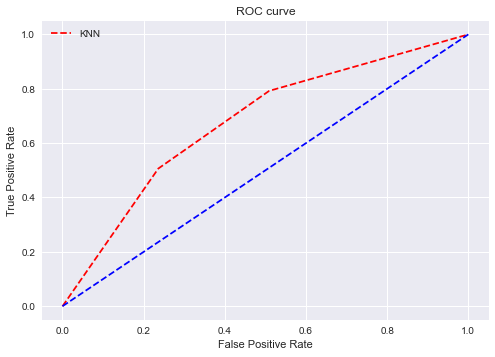

In [492]:
# plot roc curve (original data)

plt.style.use('seaborn')


plt.plot(tpr6, fpr6, linestyle='--',color='red', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_KNN_BMI30_res.pdf")
plt.show();

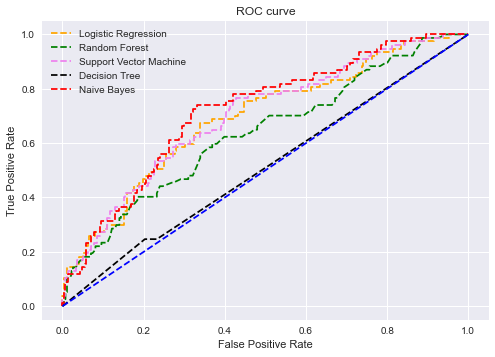

In [493]:
# a plot of roc curves of all 5 models (oversampled data)
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr1, fpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(tpr2, fpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(tpr3, fpr3, linestyle='--',color='violet', label='Support Vector Machine')
plt.plot(tpr4, fpr4, linestyle='--',color='black', label='Decision Tree')
plt.plot(tpr5, fpr5, linestyle='--',color='red', label='Naive Bayes')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_all5_BMI30_res.pdf")
plt.show();

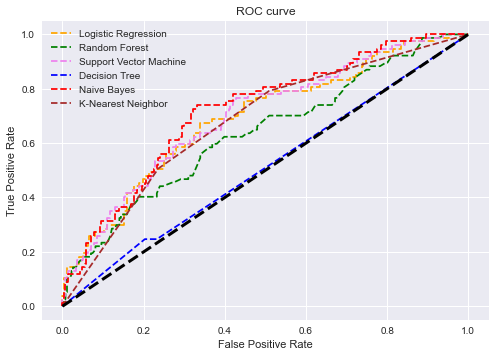

In [494]:
# a plot of roc curves of all 6 models (oversampled data)
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr1, fpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(tpr2, fpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(tpr3, fpr3, linestyle='--',color='violet', label='Support Vector Machine')
plt.plot(tpr4, fpr4, linestyle='--',color='blue', label='Decision Tree')
plt.plot(tpr5, fpr5, linestyle='--',color='red', label='Naive Bayes')
plt.plot(tpr6, fpr6, linestyle='--',color='brown', label='K-Nearest Neighbor')

plt.plot(p_fpr, p_tpr, linestyle='--', color='black', linewidth=3)
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_all6_BMI30_res.pdf")
plt.show();

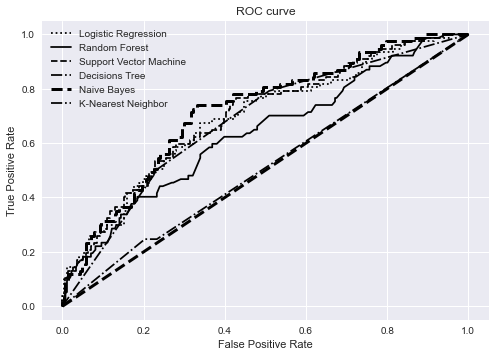

In [495]:
# a plot of roc curves of all 6 models / black and white
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr1, fpr1, linestyle=':',color = 'black',label='Logistic Regression')
plt.plot(tpr2, fpr2, linestyle='-',color='black', label='Random Forest')
plt.plot(tpr3, fpr3, linestyle='--',color='black', label='Support Vector Machine')
plt.plot(tpr4, fpr4, linestyle='-.',color='black', label='Decisions Tree')
plt.plot(tpr5, fpr5, linestyle='--',color='black', linewidth=3, label='Naive Bayes')
plt.plot(tpr6, fpr6, linestyle='-.',color='black', label='K-Nearest Neighbor')

plt.plot(p_fpr, p_tpr, linestyle='--', color='black', linewidth=3)
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_all6_BW_BMI30_res.pdf")
plt.show();